In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [12]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
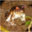

In [6]:
x_train[0]

In [13]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [23]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [19]:
def plot_sample(x,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])


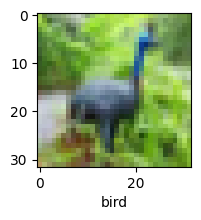

In [48]:
plot_sample(x_train, y_train, 6)

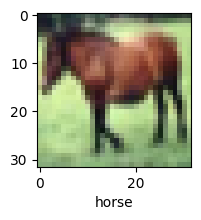

In [49]:
plot_sample(x_train, y_train,7)

In [28]:
x_train = x_train / 255
x_test = x_test / 255

In [29]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 162s 103ms/step - loss: 1.8151 - accuracy: 0.3539
Epoch 2/5
1563/1563 [==============================] - 148s 95ms/step - loss: 1.6253 - accuracy: 0.4267
Epoch 3/5
1563/1563 [==============================] - 137s 88ms/step - loss: 1.5412 - accuracy: 0.4583
Epoch 4/5
1563/1563 [==============================] - 178s 114ms/step - loss: 1.4818 - accuracy: 0.4770
Epoch 5/5
1563/1563 [==============================] - 162s 104ms/step - loss: 1.4319 - accuracy: 0.4951


In [30]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 11s 34ms/step - loss: 1.5252 - accuracy: 0.4532


[1.5252211093902588, 0.45320001244544983]

In [31]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 12s 39ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.44      0.65      0.53      1000
           1       0.52      0.72      0.61      1000
           2       0.32      0.50      0.39      1000
           3       0.38      0.29      0.33      1000
           4       0.48      0.23      0.31      1000
           5       0.43      0.29      0.34      1000
           6       0.70      0.22      0.33      1000
           7       0.38      0.74      0.50      1000
           8       0.70      0.42      0.52      1000
           9       0.62      0.46      0.53      1000

    accuracy                           0.45     10000
   macro avg       0.50      0.45      0.44     10000
weighted avg       0.50      0.45      0.44     10000



In [32]:
cnn = models.Sequential([
        # cnn
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        #dense
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

In [33]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 64s 40ms/step - loss: 1.4996 - accuracy: 0.4643
Epoch 2/10
1563/1563 [==============================] - 81s 52ms/step - loss: 1.1353 - accuracy: 0.6002
Epoch 3/10
1563/1563 [==============================] - 95s 61ms/step - loss: 1.0077 - accuracy: 0.6479
Epoch 4/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.9246 - accuracy: 0.6781
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8604 - accuracy: 0.7014
Epoch 6/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.8080 - accuracy: 0.7195
Epoch 7/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.7634 - accuracy: 0.7337
Epoch 8/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7229 - accuracy: 0.7469
Epoch 9/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.6844 - accuracy: 0.7611
Epoch 10/10
1563/1563 [==============================] - 65s 42m

In [35]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 11s 35ms/step - loss: 0.9274 - accuracy: 0.6898


[0.9273753762245178, 0.6898000240325928]

In [37]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

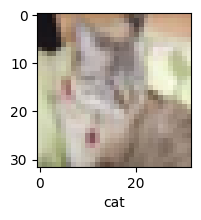

In [50]:
plot_sample(x_test, y_test,8)

In [39]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 3s 11ms/step


array([[3.2869642e-04, 1.2107591e-05, 1.1270051e-02, 7.9520732e-01,
        1.1717234e-02, 9.9051900e-02, 4.7971752e-02, 1.1363422e-03,
        3.3288993e-02, 1.5485521e-05],
       [2.5124149e-02, 3.8260643e-03, 7.1467402e-06, 6.9098029e-08,
        3.2818164e-06, 6.4066746e-10, 3.2813375e-08, 1.3049926e-07,
        9.7097611e-01, 6.2928666e-05],
       [1.6438955e-02, 2.7347642e-01, 1.3946714e-03, 2.9738436e-03,
        6.5433979e-04, 5.9322363e-05, 3.3542622e-04, 1.5910720e-03,
        5.6969136e-01, 1.3338463e-01],
       [6.2613845e-01, 2.1888085e-03, 9.5434792e-02, 1.4397441e-03,
        2.6224297e-01, 6.8165600e-06, 1.6510454e-05, 2.8390314e-03,
        9.5230546e-03, 1.6992731e-04],
       [2.4276143e-05, 4.7238551e-05, 9.8406263e-02, 4.0124591e-02,
        3.2883877e-01, 2.4909223e-03, 5.2282029e-01, 1.2135525e-04,
        7.1140211e-03, 1.2267380e-05]], dtype=float32)

In [40]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [41]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

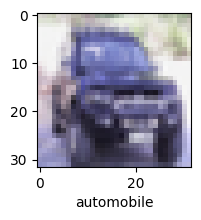

In [51]:
plot_sample(x_test, y_test,9)

In [52]:
classes[y_classes[9]]

'automobile'

In [45]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.62      0.69      1000
           1       0.85      0.76      0.80      1000
           2       0.53      0.61      0.57      1000
           3       0.49      0.57      0.53      1000
           4       0.65      0.65      0.65      1000
           5       0.69      0.51      0.59      1000
           6       0.77      0.75      0.76      1000
           7       0.73      0.77      0.75      1000
           8       0.76      0.83      0.79      1000
           9       0.73      0.82      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

